In [48]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re

In [9]:
df = pd.read_csv("../data/Results.csv")

Change Yes/No to 1 and 0

In [14]:
df.Fastest = df.Fastest.map(dict(Yes=1, No=0))
df.Cheapest = df.Cheapest.map(dict(Yes=1, No=0))
df.Comfortable = df.Comfortable.map(dict(Yes=1, No=0))
df.OnlyOption = df.OnlyOption.map(dict(Yes=1, No=0))
df.Environmental = df.Environmental.map(dict(Yes=1, No=0))
df.Healthiest = df.Healthiest.map(dict(Yes=1, No=0))
df.OtherTrips = df.OtherTrips.map(dict(Yes=1, No=0))

Change NaN to Empty String

In [25]:
df = df.replace(np.nan, "")

Shorten Center Names

In [53]:
df.Center = df.Center.str.replace(r"[\w\s,]*\((.*)\)",r"\1")

/tmp/ipykernel_5916/792396854.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Center = df.Center.str.replace(r"[A-Za-z\s,]*\((.*)\)",r"\1")


Data Visualization

In [40]:
df[df["Center"] == "Barcelona School of Informatics (FIB)"]["GoStage1"].unique()

array(['On foot', 'Bus', 'Renfe', 'Tram',
       'Scooter (or other micro-mobility devices) with renewable charging',
       'Bicycle',
       'Combustion or electric motorcycle with non-renewable source charging',
       'FGC',
       'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),',
       '', 'Underground',
       'Scooter (or other micro-mobility devices) with non-renewable charging'],
      dtype=object)

In [55]:
pt = df.pivot_table(index="Center", columns="GoStage1", aggfunc="count", fill_value=0)["Answer"]
pt

GoStage1,,Bicycle,Bus,Combustion or electric motorcycle with non-renewable source charging,"Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),",Electric motorcycle,Electric vehicle (with Zero label and renewable source charging),FGC,On foot,Renfe,Scooter (or other micro-mobility devices) with non-renewable charging,Scooter (or other micro-mobility devices) with renewable charging,Taxi,Tram,Underground
Center,,,,,,,,,,,,,,,
EEABB,5,3,6,3,9,0,0,1,20,6,0,2,0,0,5
EEBE,6,12,19,13,12,0,0,3,56,16,2,0,1,3,18
EETAC,3,0,14,2,9,0,2,1,26,6,0,0,0,1,5
EPSEB,8,1,11,4,4,0,0,0,21,4,0,0,0,0,10
EPSEM,5,0,4,3,22,0,1,1,24,1,0,0,0,0,0
ESEIAAT,7,2,11,7,46,1,2,4,92,6,0,1,1,0,3
ETSAB,6,6,11,7,5,0,1,4,53,3,0,1,0,3,15
ETSECCPB,6,5,10,7,3,0,1,1,38,2,0,0,0,6,9
ETSEIB,7,9,18,22,10,1,1,2,68,5,0,2,0,5,24


<AxesSubplot:xlabel='GoStage1', ylabel='Center'>

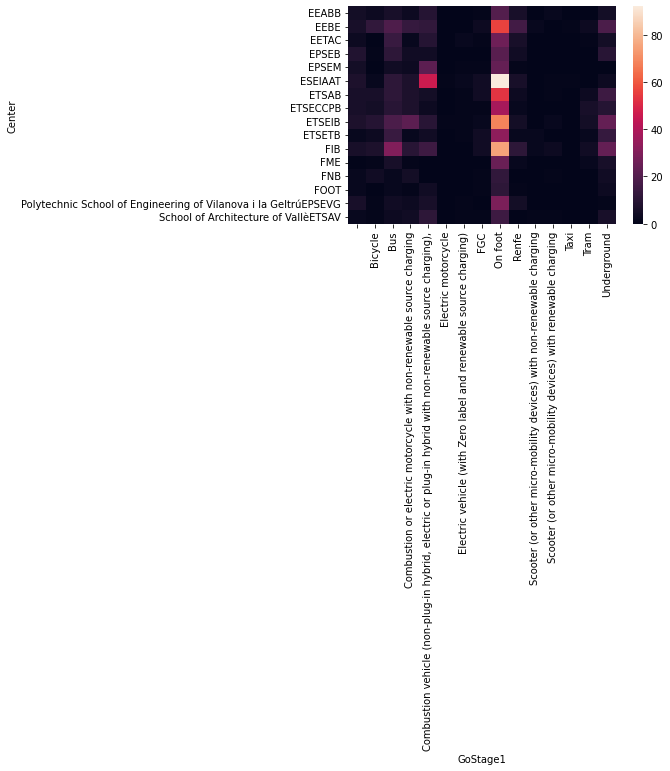

In [56]:
sns.heatmap(pt)